In [1]:
from sympy import * 
import numpy 
from __future__ import division 
init_printing(use_unicode=True)

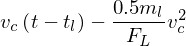

In [2]:
t = symbols('t')

# the catchers equations of motion

x_c, v_c, a_c, t_c = symbols('x_c v_c a_c t_c') # defining relevant symbols

x_c_expr = 0.5 * a_c * t**2
v_c_expr = a_c * t

# the launchers equations of motion

F_L, a_L, t_L, m_l, t_l = symbols('F_L a_L t_L m_l t_l')

x_l_expr = -1/2 * m_l * v_c**2 / F_L + v_c * (t - t_l)

x_l_expr

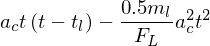

In [3]:
x_l_expr.subs(v_c, v_c_expr)

In [28]:
t_b = numpy.linspace(4,12,3)
t_b     # t_b = t_c

array([  4.,   8.,  12.])

In [29]:
x_c_func = lambdify([t, a_c], x_c_expr)
x_c_vals = x_c_func(t_b, 1)
x_c_vals

array([  8.,  32.,  72.])

In [30]:
v_c_func = lambdify([t, a_c], v_c_expr)
v_c_vals = v_c_func(t_b, 1)
v_c_vals

array([  4.,   8.,  12.])

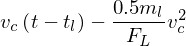

In [31]:
x_l_expr

In [43]:
F_m = 5    # Force to mass ratio - determines the acceleration of the fuel pellet

x_l_func = lambdify([t, v_c, m_l, F_L], x_l_expr)
x_l_vals = x_l_func(t_b, v_c_vals, 1, F_m)
x_l_vals

array([-4.0*t_l + 14.4, -8.0*t_l + 57.6, -12.0*t_l + 129.6], dtype=object)

In [44]:
t_l_vals = numpy.zeros(len(t_b))

for i in range(len(t_b)):
    Eq1 = Eq(x_l_vals[i], x_c_vals[i])
    print solve(Eq1, t_l)
    t_l_vals[i] = numpy.array(solve(Eq1, t_l))
    


[1.60000000000000]
[3.20000000000000]
[4.80000000000000]


In [45]:
pellet_travel_time = t_b - t_l_vals
pellet_travel_time

array([ 2.4,  4.8,  7.2])

In [46]:
pellet_av_v = x_c_vals / pellet_travel_time
pellet_av_v

array([  3.33333333,   6.66666667,  10.        ])

In [47]:
t_L = v_c_vals / F_m
t_L * F_m


array([  4.,   8.,  12.])

In [48]:
t_l_const_v = t_b / 2
t_l_const_v

array([ 2.,  4.,  6.])

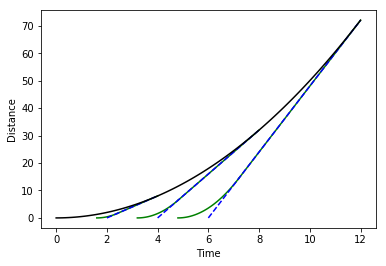

In [49]:
import matplotlib.pyplot as pyplot
from scipy import interpolate

pyplot.figure(1)

for i in range(len(t_b)):
    '''
    t_launch = t_l_vals[i]
    t_travel = pellet_travel_time[i]
    pellet_t = numpy.linspace(t_launch, t_launch + t_travel, 5)
    pellet_x = numpy.linspace(0, pellet_av_v[i] * t_travel, 5)
    '''
    
    pellet_t_const_v = numpy.array([t_l_const_v[i], t_b[i]])
    pellet_x_const_v = numpy.array([0, x_c_vals[i]])
    
    t_a = numpy.linspace(0, t_L[i], 100)
    pellet_x_a = 0.5 * F_m * t_a**2
    
    pellet_t_a = t_l_vals[i] + t_a
    
    #pyplot.plot(pellet_t, pellet_x, color = 'red')
    pyplot.plot(pellet_t_a , pellet_x_a, color = 'green')
    pyplot.plot([pellet_t_a[-1], t_b[i]], [pellet_x_a[-1], x_c_vals[i]], color = 'green')
    pyplot.plot(pellet_t_const_v, pellet_x_const_v, color = 'blue', linestyle = '--')


t_craft = numpy.linspace(0, t_b[-1] ,100)
x_craft = 0.5 * t_craft**2

'''    
f = interpolate.interp1d(t_b, x_c_vals, kind = 'quadratic')
t_b_new = numpy.linspace(t_b[0], t_b[-1], 100)
x_c_vals_new = f(t_b_new)

pyplot.plot(t_b_new, x_c_vals_new, color = 'black')
'''
pyplot.plot(t_craft, x_craft, color = 'black')

pyplot.xlabel('Time')
pyplot.ylabel('Distance')


pyplot.show()

In [54]:
print t_l_vals
t_b
t_l_const_v

[ 1.6  3.2  4.8]


array([ 2.,  4.,  6.])

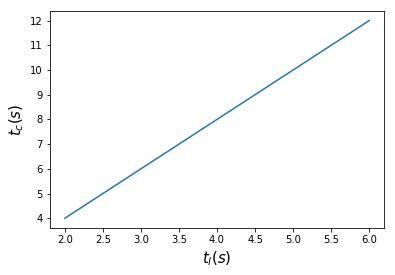

In [59]:
pyplot.figure(2)

pyplot.plot(t_l_const_v, t_b)
pyplot.xlabel('$t_l(s)$', size = 15)
pyplot.ylabel('$t_c(s)$', size = 15)

pyplot.show()